# Employee and attrition and performance:

### Dataset link : https://www.kaggle.com/datasets/patelprashant/employee-attrition

#### In this project, we need to evaluate each factor and its relationship with attrition, for example, the distance from home to office, the job role impact on attrition, etc

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [5]:
import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis**

In [6]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
df.shape

(1470, 35)

In [11]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1, inplace=True)

In [13]:
columns = list(df.columns)
categorical = [data for data in columns if df[data].dtype=='object']
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
for data in categorical:
    print(pd.crosstab(df[data],df['Attrition'],margins=True))
    print('------------------------------------------------')

Attrition    No  Yes   All
Attrition                 
No         1233    0  1233
Yes           0  237   237
All        1233  237  1470
------------------------------------------------
Attrition            No  Yes   All
BusinessTravel                    
Non-Travel          138   12   150
Travel_Frequently   208   69   277
Travel_Rarely       887  156  1043
All                1233  237  1470
------------------------------------------------
Attrition                 No  Yes   All
Department                             
Human Resources           51   12    63
Research & Development   828  133   961
Sales                    354   92   446
All                     1233  237  1470
------------------------------------------------
Attrition           No  Yes   All
EducationField                   
Human Resources     20    7    27
Life Sciences      517   89   606
Marketing          124   35   159
Medical            401   63   464
Other               71   11    82
Technical Degree   100   32   

# **Data Visualization**

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

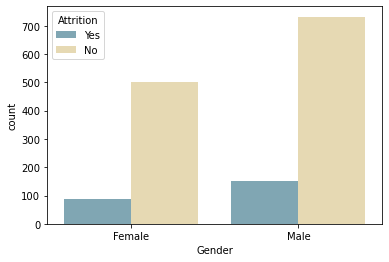

In [18]:
sns.countplot(x='Gender', hue='Attrition', data=df, palette='blend:#7AB,#EDA')
plt.show()

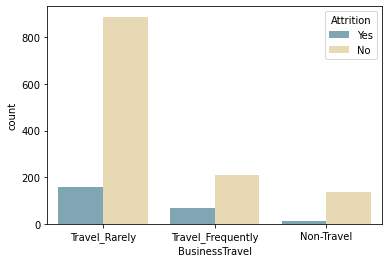

In [19]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='blend:#7AB,#EDA')
plt.show()

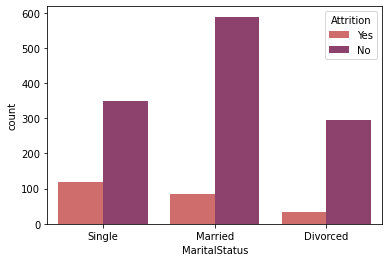

In [20]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='flare')
plt.show()

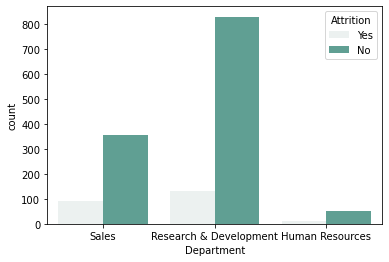

In [21]:
sns.countplot(x='Department', hue='Attrition', data=df, palette='light:#5A9')
plt.show()

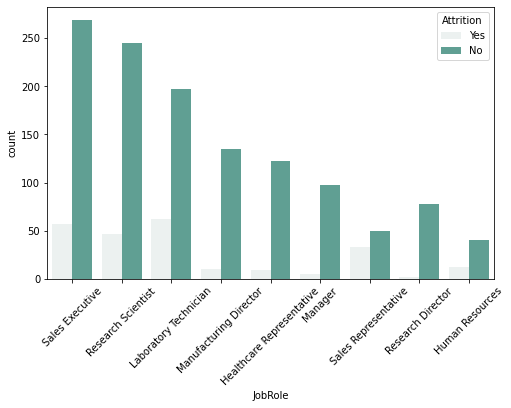

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='light:#5A9')
plt.xticks(rotation=45)
plt.show()

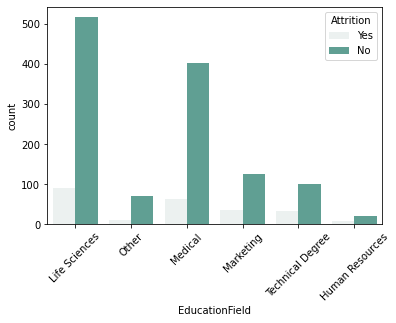

In [24]:
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='light:#5A9')
plt.xticks(rotation=45)
plt.show()

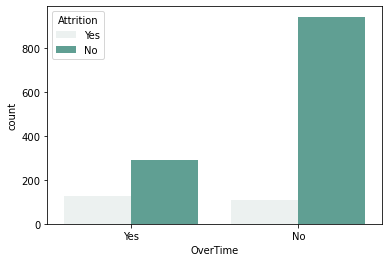

In [25]:
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='light:#5A9')
plt.show()

**Some Observations:**
1. Gender: Male employees quit more than female employees.
2. Business Travel: The employees who travel rarely are more likely to quit than other employees.
3. Marital Status: Employees who are single tend to quit their jobs more than the married or divorced.
4. Department: Research and Development employees don't quit their jobs as much as the other departments.
5. Job Role: Sales Executives, Laboratory Technicians and Research Scientists are more likely to quit than other employees.
6. Education Field: Employees from Life Sciences, Medical and Marketing educational background are more likely to stay than other employees of different educational background.
7. Over Time: Employees who do over time, quit more.

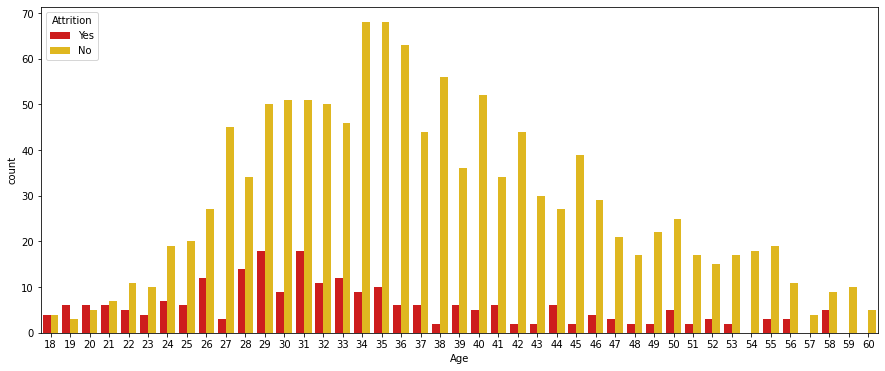

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age', hue='Attrition', data=df, palette='hot')
plt.show()

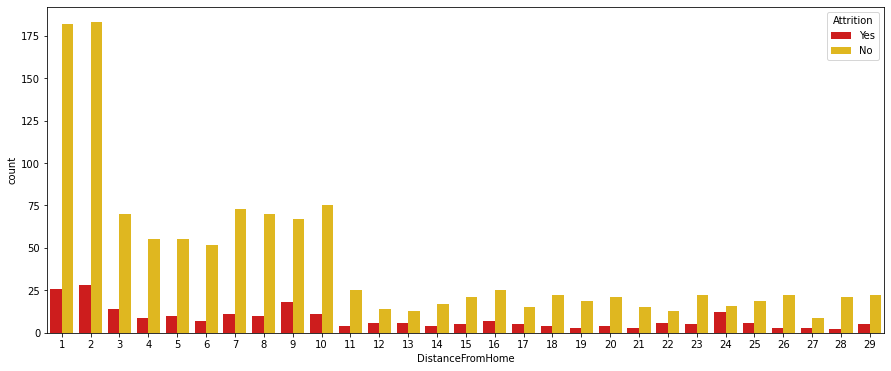

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df, palette='hot')
plt.show()

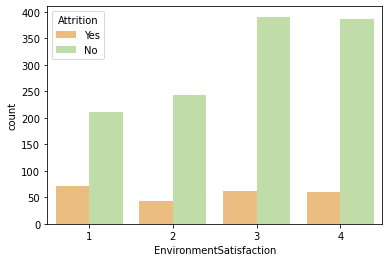

In [29]:
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='Spectral')
plt.show()

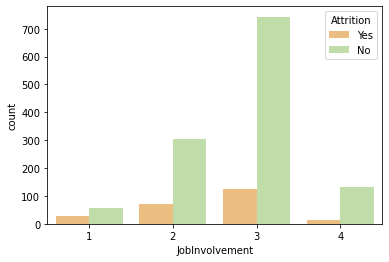

In [30]:
sns.countplot(x='JobInvolvement', hue='Attrition', data=df, palette='Spectral')
plt.show()

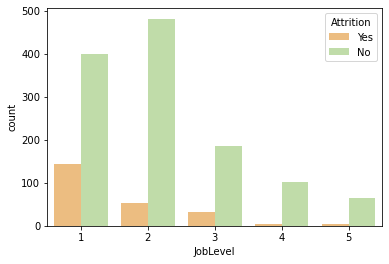

In [31]:
sns.countplot(x='JobLevel', hue='Attrition', data=df, palette='Spectral')
plt.show()

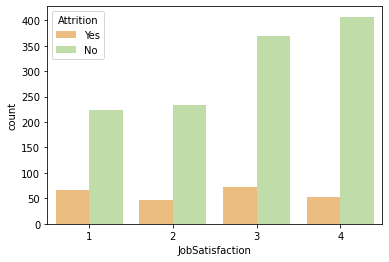

In [32]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='Spectral')
plt.show()

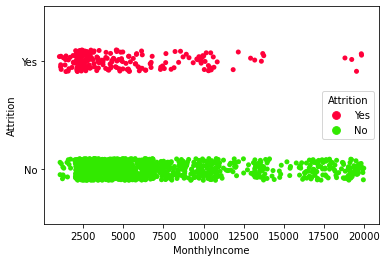

In [33]:
sns.stripplot(data=df, x='MonthlyIncome', y='Attrition', palette='prism_r', hue='Attrition')
plt.show()

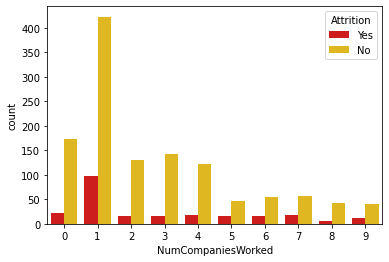

In [34]:
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df, palette='hot')
plt.show()

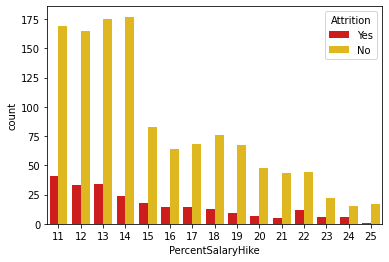

In [35]:
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df, palette='hot')
plt.show()

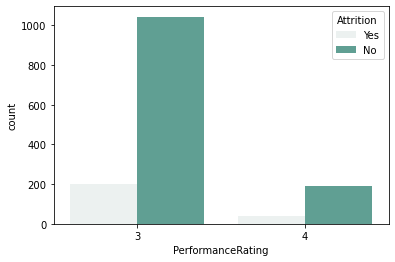

In [38]:
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette='light:#5A9')
plt.show()

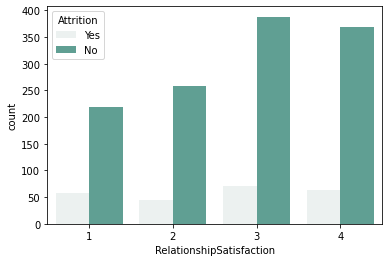

In [39]:
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette='light:#5A9')
plt.show()

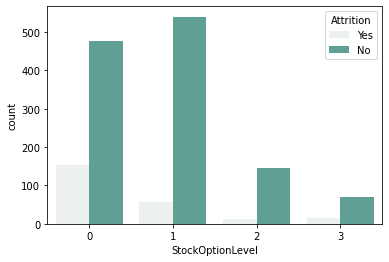

In [40]:
sns.countplot(x='StockOptionLevel', hue='Attrition', data=df, palette='light:#5A9')
plt.show()

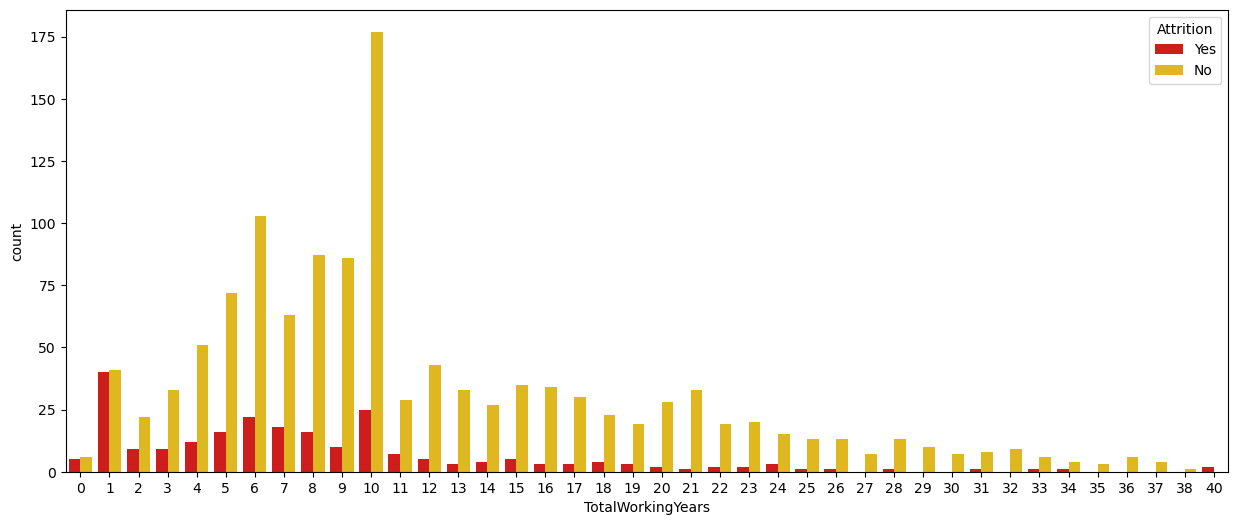

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df, palette='hot')
plt.show()

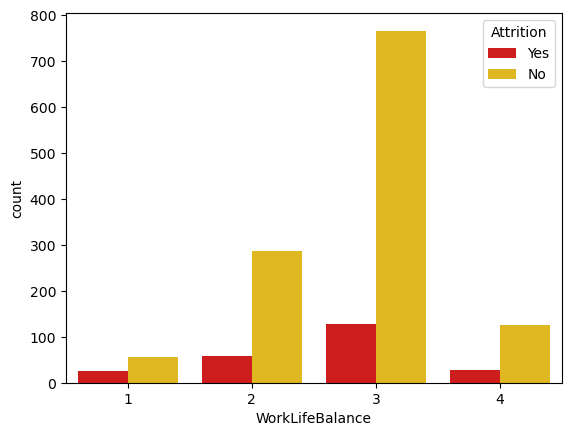

In [32]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='hot')
plt.show()

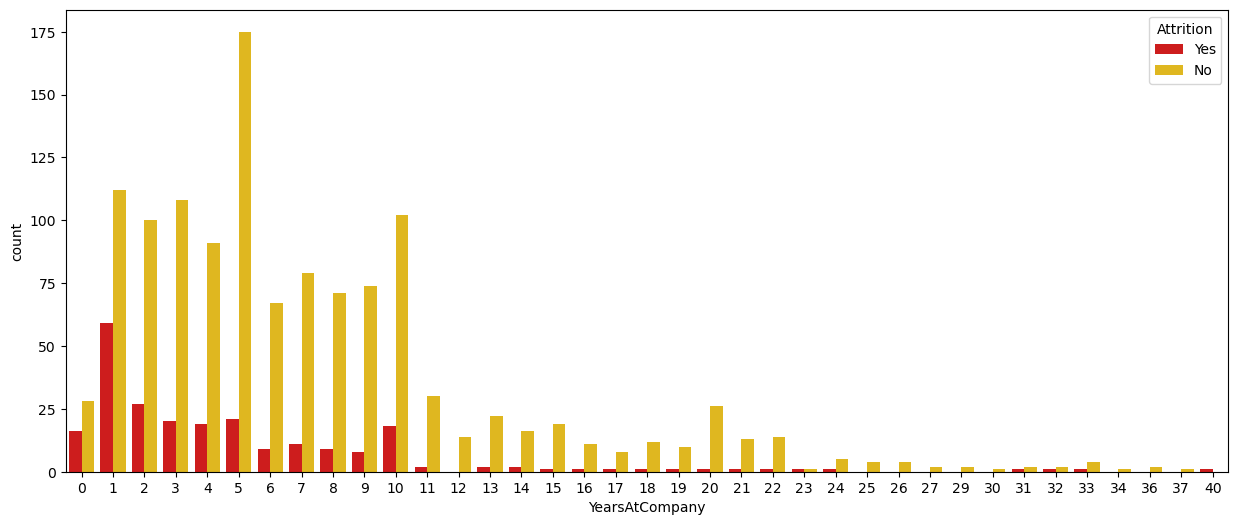

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette='hot')
plt.show()

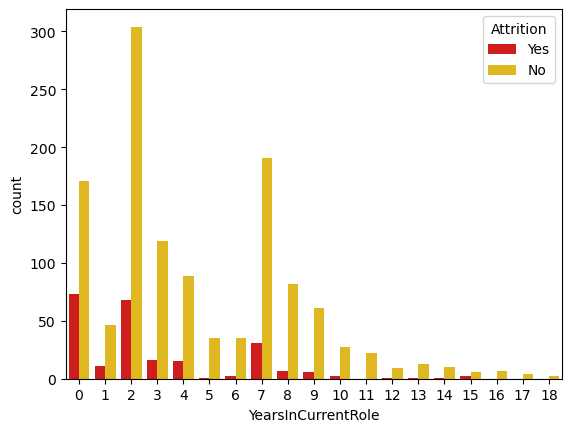

In [34]:
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='hot')
plt.show()

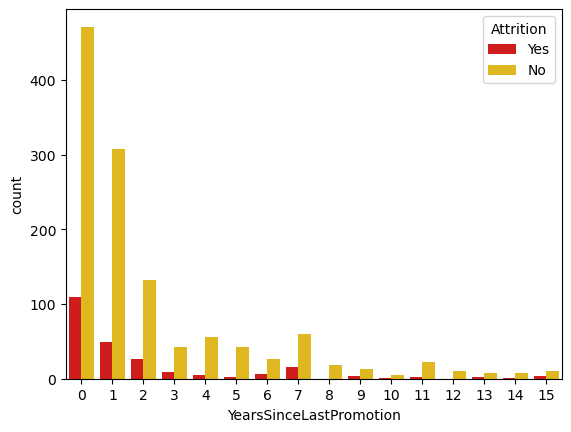

In [35]:
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, palette='hot')
plt.show()

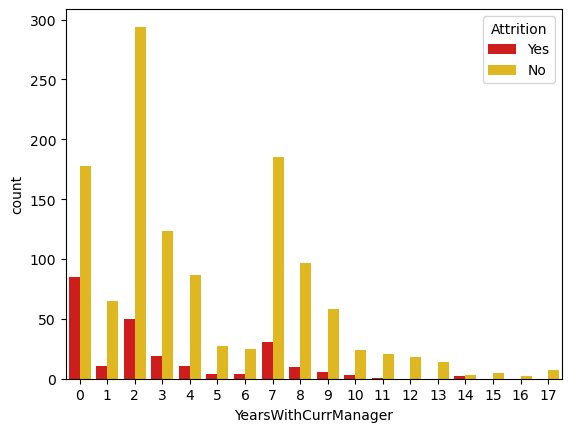

In [36]:
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df, palette='hot')
plt.show()

**Some Observations:**
1. Young employees aged below 22 yrs, quit their jobs more than the rest.
2. Employees who travel more than 10 kms to reach office, are more likely to quit.
3. Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Job Involvement, Performance Rating, Stock Option Level, Work Life Balance: these features don't really help us in understanding the employees' attrition.
4. Employees with low Job Level, Monthly Income, Percent Salary Hike, Total Working Years, Years At Company are prone to quitting their jobs.
5. Employees who have worked in less than 2 comapanies, are more likely to stay.
6. Employees who have received promotion recently within 2 years, will stay than employees who haven't received any promotion for a long time.
7. Employees who have spent more than 2 years with their current manager, are more likely to stay.

# **Correlation Matrix**

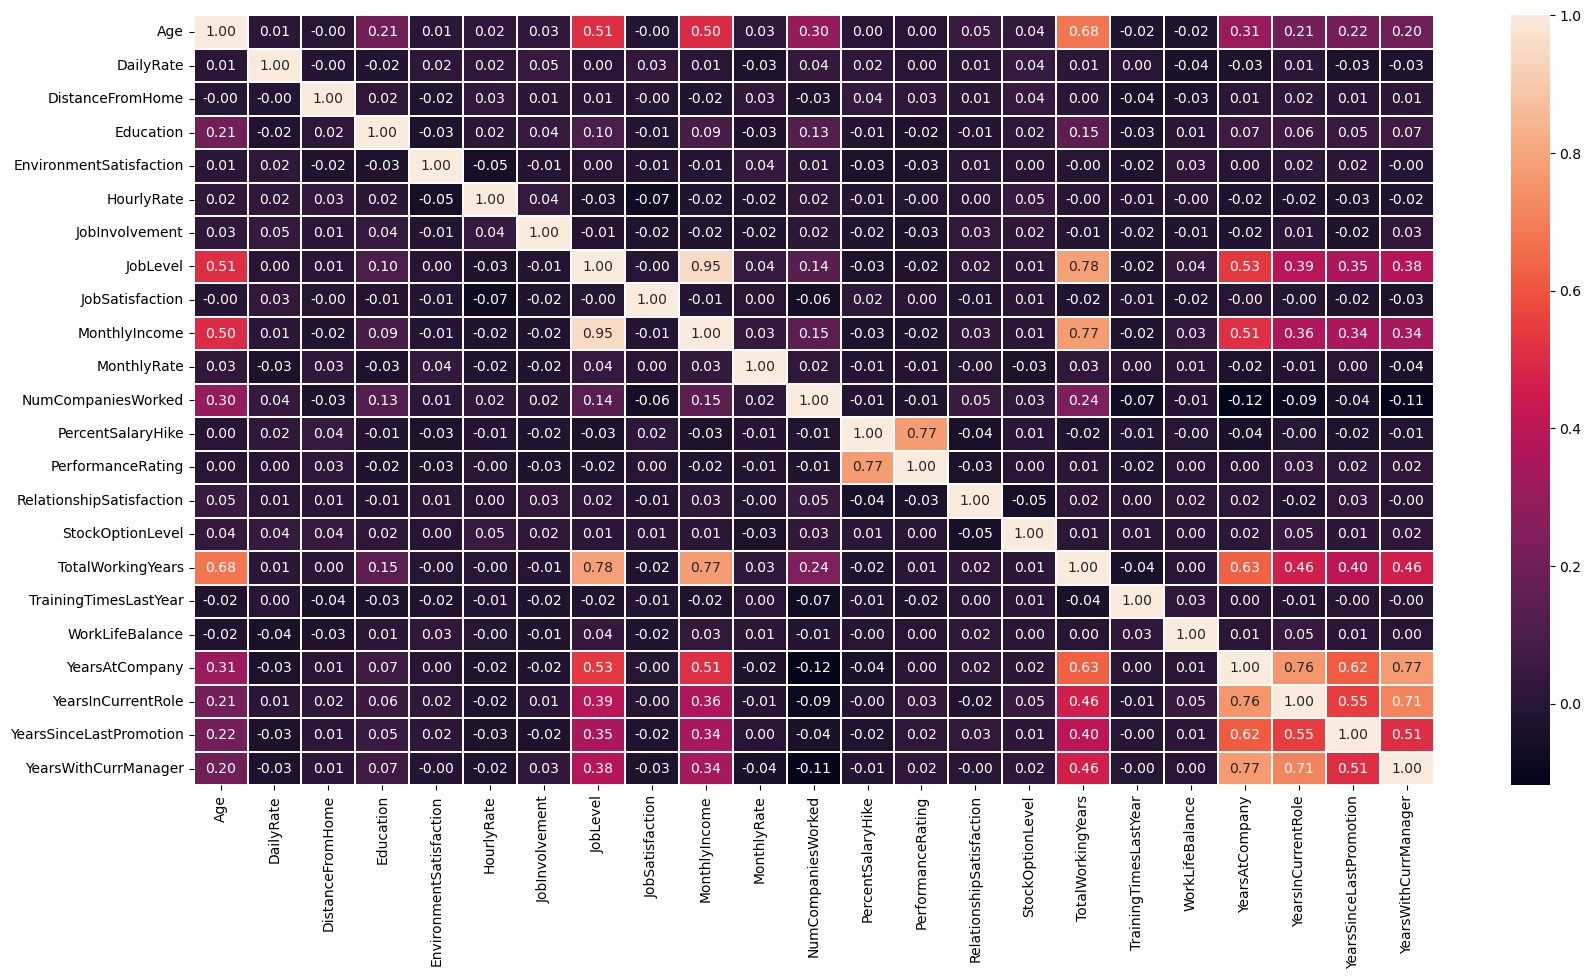

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth='0.2')
plt.show()

**Some Observations:**
1. Job Level and Monthly Income are highly correlated.
2. Monthly Income is highly correlated with Total Working Hours.
3. Job Level and Total Working Hours are highly correlated.
4. Performance Rating is highly correlated with Percent Salary Hike.
5. Years in Current Role and Years with Current Manager has high correlation with Years at Company.

# **Data Processing**

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Attrition"] = le.fit_transform(df.Attrition)

In [39]:
X = df.drop('Attrition',1)
Y = df.Attrition

In [40]:
columns_to_encode=[]
for i in X.columns:
    if df[i].nunique() < 20:
        columns_to_encode.append(i)

columns_to_encode

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [41]:
X=pd.get_dummies(X, columns=columns_to_encode, drop_first=True)
X

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,1102,1,94,5993,19479,8,6,0,1,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,61,5130,24907,10,10,1,0,...,0,0,0,0,0,0,0,0,0,0
2,37,1373,2,92,2090,2396,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,33,1392,3,56,2909,23159,8,8,1,0,...,0,0,0,0,0,0,0,0,0,0
4,27,591,2,40,3468,16632,6,2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,17,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1466,39,613,6,42,9991,21457,9,7,0,1,...,0,0,0,0,0,0,0,0,0,0
1467,27,155,4,87,6142,5174,6,6,0,1,...,0,0,0,0,0,0,0,0,0,0
1468,49,1023,2,63,5390,13243,17,9,1,0,...,1,0,0,0,0,0,0,0,0,0


# **Applying Machine Learning Algorithms**

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=42,stratify=Y)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

lr_Y_test_pred = lr.predict(X_test_std)
lr_Y_train_pred = lr.predict(X_train_std)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       986
           1       0.84      0.65      0.73       190

    accuracy                           0.92      1176
   macro avg       0.89      0.81      0.84      1176
weighted avg       0.92      0.92      0.92      1176

The accuracy score for the train data : 0.923469387755102


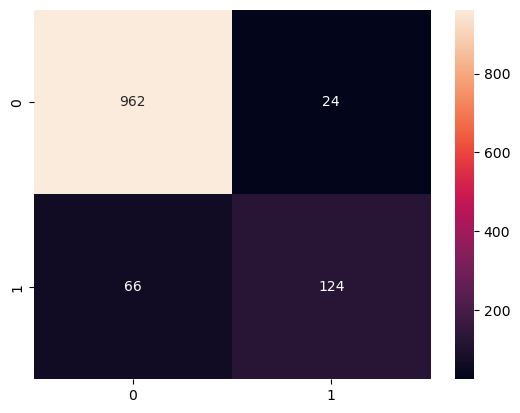

In [45]:
sns.heatmap(confusion_matrix(Y_train, lr_Y_train_pred), annot=True, fmt='d')
print(classification_report(Y_train, lr_Y_train_pred))
print('The accuracy score for the train data :', accuracy_score(Y_train, lr_Y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       247
           1       0.53      0.43      0.47        47

    accuracy                           0.85       294
   macro avg       0.71      0.68      0.69       294
weighted avg       0.84      0.85      0.84       294

The accuracy score for the test data : 0.8469387755102041


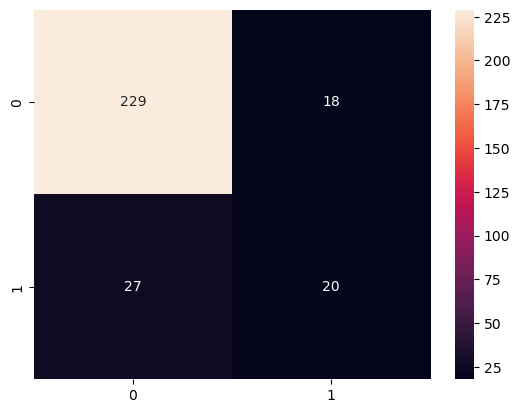

In [46]:
sns.heatmap(confusion_matrix(Y_test, lr_Y_test_pred), annot=True, fmt='d')
print(classification_report(Y_test, lr_Y_test_pred))
print('The accuracy score for the test data :', accuracy_score(Y_test, lr_Y_test_pred))

**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [48]:
rf_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294



In [49]:
tuned_parameters = [{'max_depth': [10,50,100,200], 'n_estimators': [50,100,200,500], 'max_features': ['sqrt', 'auto']}] 
rf = RandomForestClassifier() 
rf_clf = GridSearchCV(rf, tuned_parameters, cv=5) 
rf_clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 50, 100, 200],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [50, 100, 200, 500]}])

In [50]:
rf = RandomForestClassifier(**rf_clf.best_params_) 
rf.fit( X_train, Y_train )

RandomForestClassifier(max_depth=100, n_estimators=200)

In [51]:
rf_Y_train_pred = rf.predict(X_train)
rf_Y_test_pred = rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

The accuracy score for the train data: 1.0


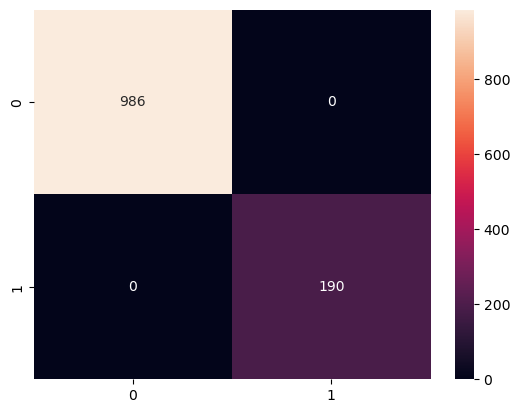

In [52]:
sns.heatmap(confusion_matrix(Y_train, rf_Y_train_pred), annot=True, fmt='d')
print(classification_report(Y_train, rf_Y_train_pred))
print('The accuracy score for the train data:', accuracy_score(Y_train, rf_Y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294

The accuracy score for the test data: 0.8401360544217688


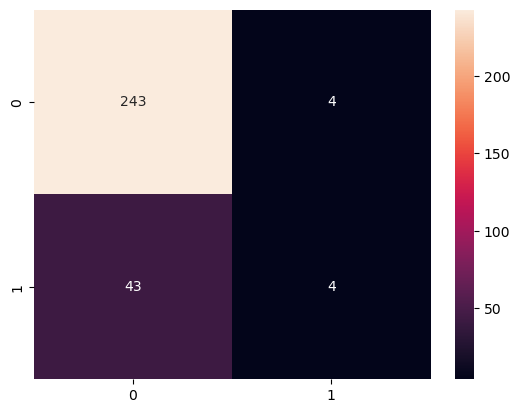

In [53]:
sns.heatmap(confusion_matrix(Y_test, rf_Y_test_pred), annot=True, fmt='d')
print(classification_report(Y_test, rf_Y_test_pred))
print('The accuracy score for the test data:', accuracy_score(Y_test, rf_Y_test_pred))

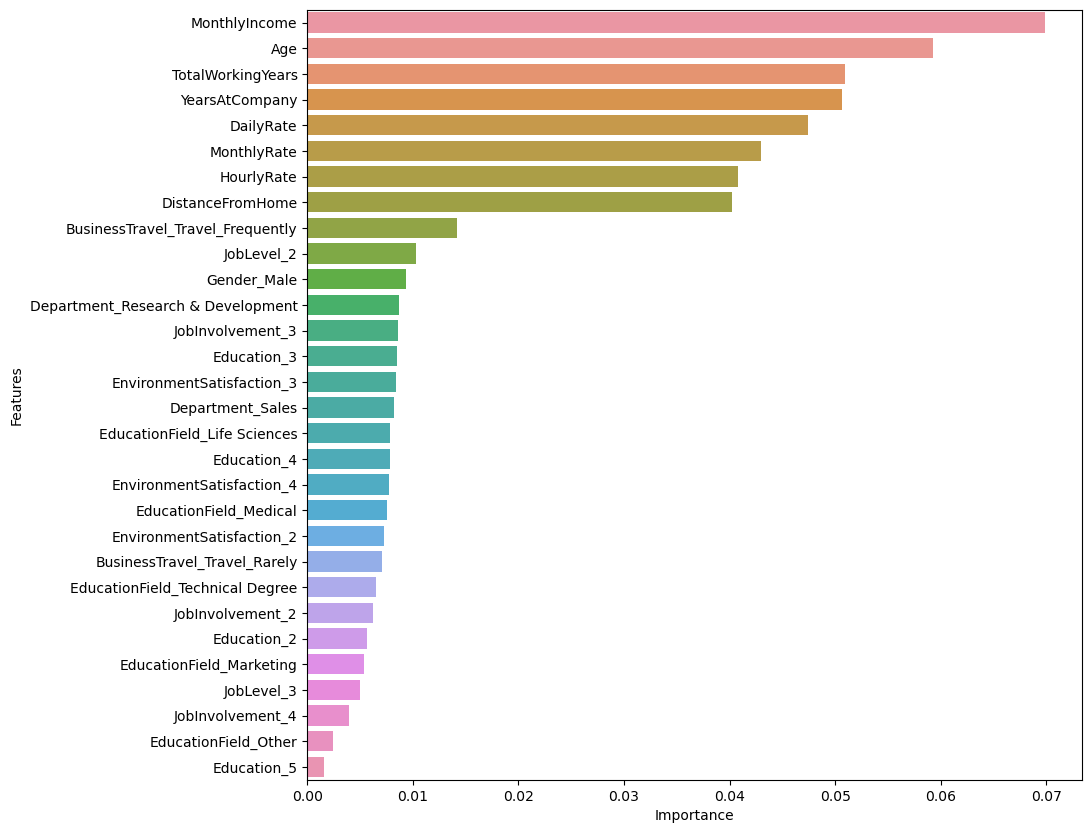

In [54]:
imp_features_rf = pd.DataFrame( { 'Features': X_train.columns, 'Importance': rf.feature_importances_ } )[:30]
imp_features_rf = imp_features_rf.sort_values('Importance', ascending = False) 
plt.figure(figsize=(10, 10))
sns.barplot( y = 'Features', x = 'Importance', data = imp_features_rf )
plt.show()

**Support Vector Machine**

In [55]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_std, Y_train)

SVC()

In [56]:
svm_pred = rf.predict(X_test_std)
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.92      0.41      0.57       247
           1       0.21      0.81      0.33        47

    accuracy                           0.47       294
   macro avg       0.56      0.61      0.45       294
weighted avg       0.80      0.47      0.53       294



In [57]:
parameter_tuning = [{'C': [1, 10, 100], 'kernel': ['linear']},
                    {'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}]
svm = SVC()
svm_clf = GridSearchCV(svm, parameter_tuning, cv=5)
svm_clf.fit(X_train_std, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [58]:
svm = SVC(**svm_clf.best_params_)
svm.fit(X_train_std, Y_train)

SVC(C=10, gamma=0.001)

In [59]:
svm_Y_train_pred = svm.predict(X_train_std)
svm_Y_test_pred = svm.predict(X_test_std)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       986
           1       0.97      0.58      0.73       190

    accuracy                           0.93      1176
   macro avg       0.95      0.79      0.85      1176
weighted avg       0.93      0.93      0.92      1176

The accuracy score for the train data: 0.9302721088435374


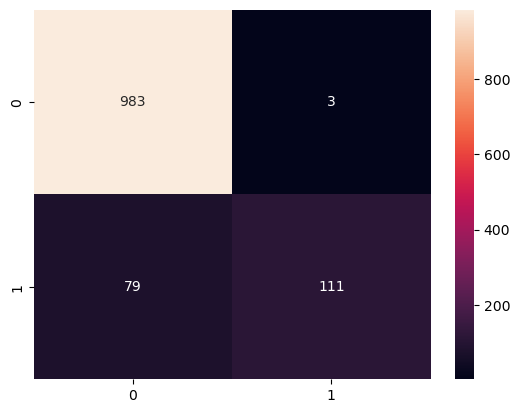

In [60]:
sns.heatmap(confusion_matrix(Y_train, svm_Y_train_pred), annot=True, fmt='d')
print(classification_report(Y_train, svm_Y_train_pred))
print('The accuracy score for the train data:', accuracy_score(Y_train, svm_Y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.60      0.26      0.36        47

    accuracy                           0.85       294
   macro avg       0.74      0.61      0.64       294
weighted avg       0.83      0.85      0.83       294

The accuracy score for the test data: 0.8537414965986394


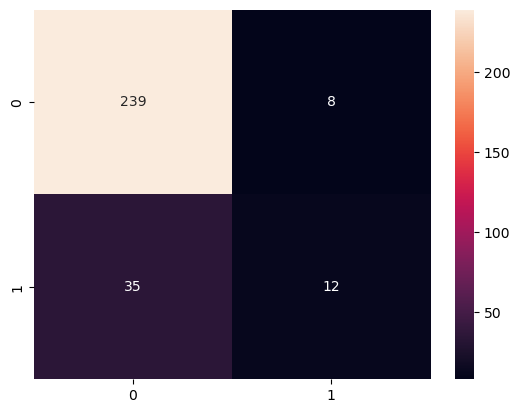

In [61]:
sns.heatmap(confusion_matrix(Y_test, svm_Y_test_pred), annot=True, fmt='d')
print(classification_report(Y_test, svm_Y_test_pred))
print('The accuracy score for the test data:', accuracy_score(Y_test, svm_Y_test_pred))

**XGBoost**

In [62]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
xgb_Y_train_pred = xgb.predict(X_train)
xgb_Y_test_pred = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

The accuracy score for the train data: 1.0


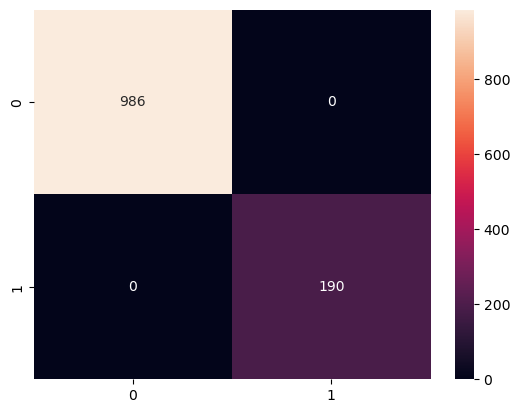

In [64]:
sns.heatmap(confusion_matrix(Y_train, xgb_Y_train_pred), annot=True, fmt='d')
print(classification_report(Y_train, xgb_Y_train_pred))
print('The accuracy score for the train data:',accuracy_score(Y_train, xgb_Y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.56      0.19      0.29        47

    accuracy                           0.85       294
   macro avg       0.71      0.58      0.60       294
weighted avg       0.82      0.85      0.81       294

The accuracy score for the test data: 0.8469387755102041


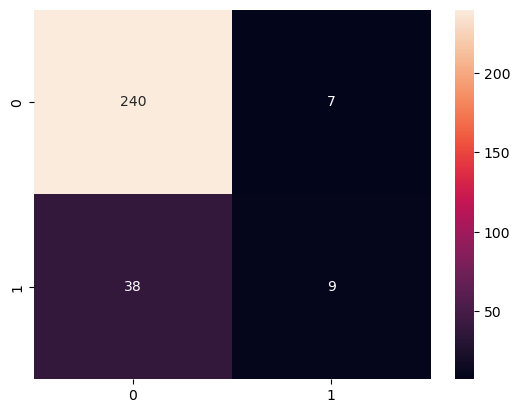

In [65]:
sns.heatmap(confusion_matrix(Y_test, xgb_Y_test_pred), annot=True, fmt='d')
print(classification_report(Y_test, xgb_Y_test_pred))
print('The accuracy score for the test data:', accuracy_score(Y_test, xgb_Y_test_pred))

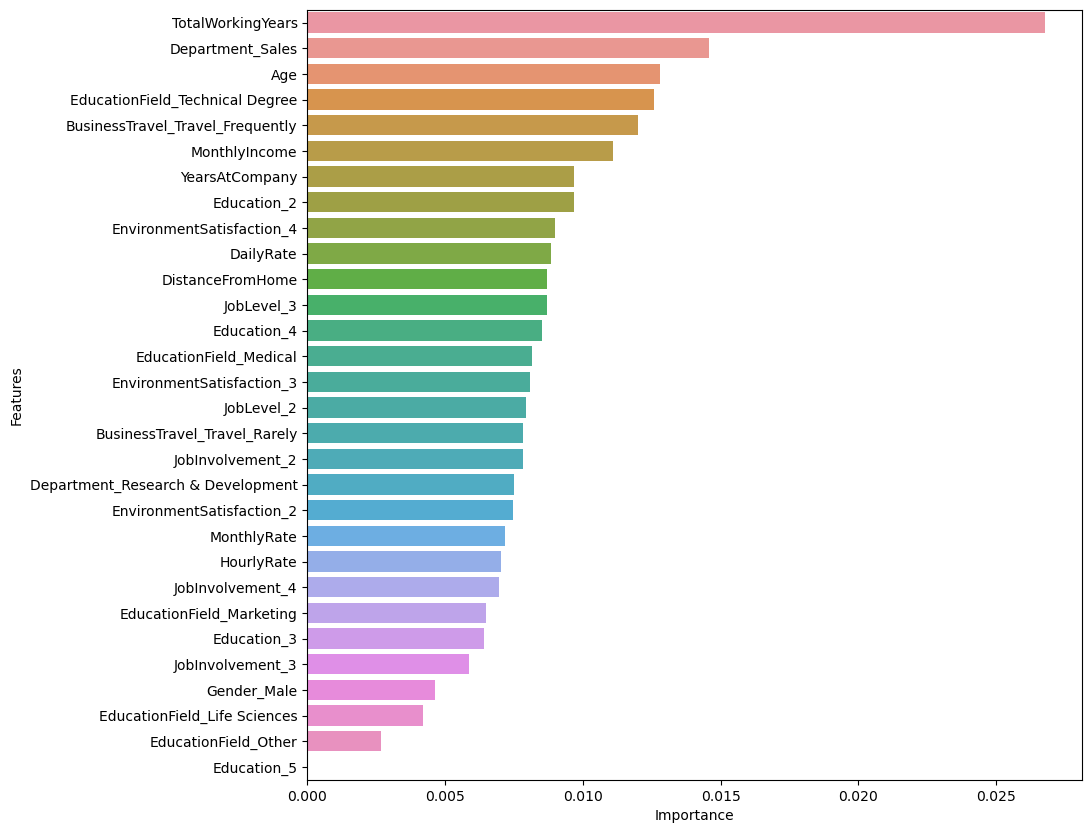

In [66]:
imp_features_xgb = pd.DataFrame( { 'Features': X_train.columns, 'Importance': xgb.feature_importances_ } )[:30]
imp_features_xgb = imp_features_xgb.sort_values('Importance', ascending = False) 
plt.figure(figsize=(10, 10))
sns.barplot( y = 'Features', x = 'Importance', data = imp_features_xgb )
plt.show()

# **Comparing the performance of the different ML Algorithms used**

In [67]:
MLA = [ lr, #LogisticRegression()
        rf, #RandomForestClassifier()
        svm, #SVC()
        xgb, #XGBClassifier()
        ]

In [68]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_train_std, Y_train).predict(X_test_std)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = (alg.score(X_train_std, Y_train))
    MLA_compare.loc[row_index, 'Test Accuracy'] = (alg.score(X_test_std, Y_test))
    
    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False)    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy
0,LogisticRegression,0.923469,0.846939
1,RandomForestClassifier,1.000000,0.833333
2,SVC,0.930272,0.853741
3,XGBClassifier,1.000000,0.846939


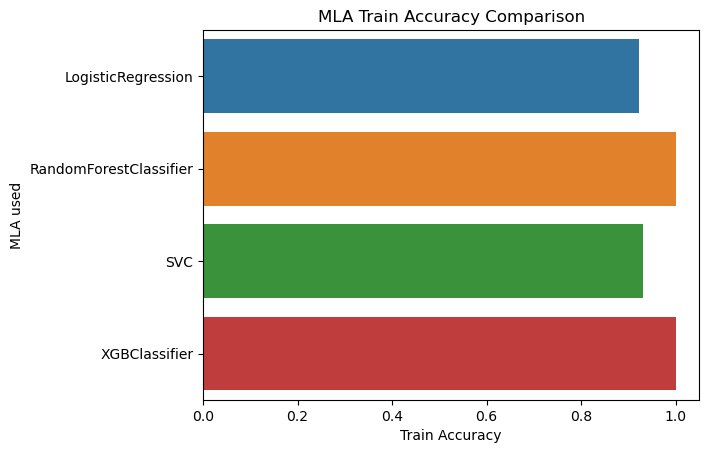

In [69]:
sns.barplot(y="MLA used", x="Train Accuracy",data=MLA_compare)
plt.title('MLA Train Accuracy Comparison')
plt.show()

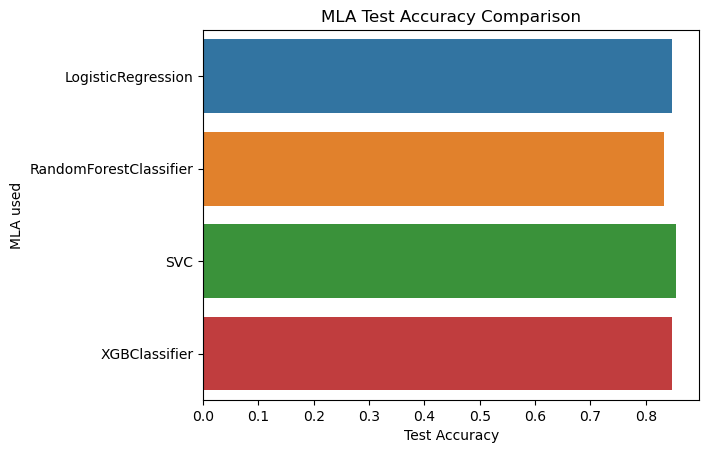

In [70]:
sns.barplot(y="MLA used", x="Test Accuracy",data=MLA_compare)
plt.title('MLA Test Accuracy Comparison')
plt.show()